In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import joblib as jb

In [4]:
diabetesDF = pd.read_csv('diabetes.csv')
print(diabetesDF.shape)
diabetesDF.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetesDF.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
408,8,197,74,0,0,25.9,1.191,39,1
157,1,109,56,21,135,25.2,0.833,23,0
219,5,112,66,0,0,37.8,0.261,41,1
401,6,137,61,0,0,24.2,0.151,55,0
31,3,158,76,36,245,31.6,0.851,28,1


In [6]:
mean_insulin = diabetesDF['Insulin'].mean(skipna=True)
mean_glucose = diabetesDF['Glucose'].mean(skipna=True)
mean_BP = diabetesDF['BloodPressure'].mean(skipna=True)
mean_BMI = diabetesDF['BMI'].mean(skipna=True)
mean_skinthickness = diabetesDF['SkinThickness'].mean(skipna=True)

diabetesDF['Insulin'] = diabetesDF.Insulin.mask(diabetesDF.Insulin == 0, mean_insulin)
diabetesDF['Glucose'] = diabetesDF.Glucose.mask(diabetesDF.Glucose == 0, mean_glucose)
diabetesDF['BloodPressure'] = diabetesDF.BloodPressure.mask(diabetesDF.BloodPressure == 0, mean_BP)
diabetesDF['BMI'] = diabetesDF.BMI.mask(diabetesDF.BMI == 0, mean_BMI)
diabetesDF['SkinThickness'] = diabetesDF.SkinThickness.mask(diabetesDF.SkinThickness == 0, mean_skinthickness)

print(diabetesDF) 
# replaces the 0 value in insulin, BP, BMI, Skin thickness and glucose to the mean of all

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231

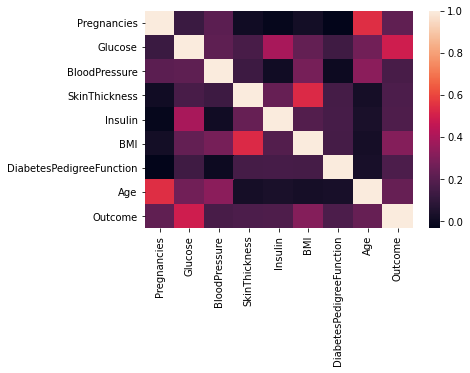

In [7]:
corr = diabetesDF.corr()
print(corr)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [8]:
#splitting data based on their rows
trainDF = diabetesDF[:700]   
testDF = diabetesDF[700:760]
checkDF = diabetesDF[760:]

In [9]:
#splitting coloumns as labels and features for training data and testing datas
trainLabel = np.asarray(trainDF['Outcome'])
trainData = np.asarray(trainDF.drop('Outcome', 1))
testLabel = np.asarray(testDF['Outcome'])
testData = np.asarray(testDF.drop('Outcome',1))

In [10]:
#normalization-z score, each variable has 0 mean and sd of 1
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [11]:
diabetesCheck = LogisticRegression()  
diabetesCheck.fit(trainData, trainLabel) #trains the model

LogisticRegression()

In [12]:
#test data is used to find out the accuracy of the model
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy -", accuracy*100)

accuracy - 81.66666666666667


In [13]:
#joblib is more useful over pickle when ther's a lot of numpy arrays
jb.dump([diabetesCheck, means, stds], 'diabetesModel-joblib.pkl')

['diabetesModel-joblib.pkl']

In [14]:
diabetesLoadedModel, means, stds = jb.load('diabetesModel-joblib.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy -", accuracy*100)

accuracy - 81.66666666666667


In [15]:
print(checkDF.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
760            2     88.0           58.0      26.000000   16.000000  28.4   
761            9    170.0           74.0      31.000000   79.799479  44.0   
762            9     89.0           62.0      20.536458   79.799479  22.5   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   

     DiabetesPedigreeFunction  Age  Outcome  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  


In [16]:
#we'll now use the first record to make our prediction

sampleData = checkDF[:1]
sampleDataFeatures = np.asarray(sampleData.drop('Outcome', 1))
print(sampleDataFeatures)
sampleDataFeatures = (sampleDataFeatures - means)/stds
print(sampleDataFeatures)
#sample

predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

#The first element of array predictionProbability 0.91 is the probability of the class being 0 and second element 0.089 is the
#probability of the class being 1. As we can see that 0 is more probable class, we get [0] as our prediction, which means that 
#the model predicts that the person doesn't have diabetes.

[[ 2.    88.    58.    26.    16.    28.4    0.766 22.   ]]
[[-0.54347062 -1.09457056 -1.16600513 -0.05277365 -1.09318759 -0.5676853
   0.86018327 -0.9446464 ]]
Probability: [[0.91179795 0.08820205]]
prediction: [0]


In [17]:
#making a prediction by using random set of values

sampleData2 = [[1, 93, 70, 31, 0, 30.4, 0.315, 23]] 
sampleData2 = (sampleData2 - means)/stds # normalization

predictionProbability = diabetesLoadedModel.predict_proba(sampleData2)
prediction = diabetesLoadedModel.predict(sampleData2)
print('Probability:', predictionProbability)
print('prediction:', prediction)
if prediction == 0:
    print("You don't have diabetes")
else:
    print("You have diabetes")

Probability: [[0.9289859 0.0710141]]
prediction: [0]
You don't have diabetes


In [18]:
#KNN
diabetesCheck2 = KNeighborsClassifier()  
diabetesCheck2.fit(trainData, trainLabel) #trains the model

KNeighborsClassifier()

In [19]:
accuracy = diabetesCheck2.score(testData, testLabel)
print("accuracy -", accuracy*100)

accuracy - 75.0


In [20]:
#SVM
diabetesCheck3 = SVC()  
diabetesCheck3.fit(trainData, trainLabel) #trains the model

SVC()

In [21]:
accuracy = diabetesCheck3.score(testData, testLabel)
print("accuracy -", accuracy*100)

accuracy - 81.66666666666667


In [22]:
#Naive Bayes
diabetesCheck4 = GaussianNB()  
diabetesCheck4.fit(trainData, trainLabel) #trains the model

GaussianNB()

In [23]:
accuracy = diabetesCheck4.score(testData, testLabel)
print("accuracy -", accuracy*100)

accuracy - 73.33333333333333


In [24]:
#Random Forest
diabetesCheck5 = RandomForestClassifier()  
diabetesCheck5.fit(trainData, trainLabel) #trains the model

RandomForestClassifier()

In [25]:
accuracy = diabetesCheck5.score(testData, testLabel)
print("accuracy -", accuracy*100)

accuracy - 76.66666666666667


In [26]:
# Decision Tree
diabetesCheck6 = DecisionTreeClassifier()  
diabetesCheck6.fit(trainData, trainLabel) #trains the model

DecisionTreeClassifier()

In [27]:
accuracy = diabetesCheck6.score(testData, testLabel)
print("accuracy -", accuracy*100)

accuracy - 76.66666666666667
